[View in Colaboratory](https://colab.research.google.com/github/iamrajee/Data-Analysis/blob/master/colabTopic1.ipynb)

In [127]:
!ls

1.txt  3.txt  5.txt  7.txt  9.txt    nltk_data
2.txt  4.txt  6.txt  8.txt  datalab


In [0]:
# from google.colab import files
# uploaded = files.upload()

In [129]:
import nltk;
nltk.download('stopwards')
nltk.download('averaged_perceptron_tagger')
nltk.download('all')

[nltk_data] Error loading stopwards: Package 'stopwards' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /content/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /content/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /content/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /content/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Package bro

True

In [130]:
!pip install gensim

In [131]:
!pip install spacy

In [132]:
!pip install pyLDAvis

In [0]:
#@title Default title text
import re
import numpy as np
import pandas as pd

#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy for lemmatization
import spacy

#plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline


#optional
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [134]:
#NLTK Stopwords

from nltk.corpus import stopwords
stop_wards = stopwords.words('english')
stop_wards.extend(['from', 'use', 'also', 'e.g.','j.', 'm.','self','make', '_', 'likely', 'a.', '..', 'l.', 'l'])
stop_wards.extend(['firm','ceo','work','may','organizational','organization'])
# 'firm','ceo','work','may','organizational','organization'
stop_wards.extend(['identity','manager','employee','practice'])

#identity, manager, help, employee, age, practi...   
print(stop_wards)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
#!wget https://drive.google.com/file/d/1qRzkX8huvN_AOLCB58cpIxYCZkRwu9pi/view?usp=sharing

In [0]:
raw_corpus = []
for i in range(1,10):
    filename = str(i) + '.txt'
    f = open(filename,'r')#file opened
    temp = f.read()
    #raw_corpus[i] = temp
    raw_corpus.append(temp)
#print(raw_corpus)
#print(np.shape(raw_corpus))



In [137]:
# Create a set of frequent words
#stoplist = set('for a of the and to in'.split(' '))
#texts = raw_corpus.lower().split()
texts = [[word for word in document.lower().split() if word not in stop_wards]
         for document in raw_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
print(processed_corpus)

[['academy', 'management', 'journal', '2013,', 'vol.', '56,', 'no.', '2,', 'emotion', 'helping', 'managers:', 'emergent', 'understanding', 'discrepant', 'role', 'expectations', 'outcomes', 'ginka', 'toegel', 'imd,', 'lausanne', 'martin', 'kilduff', 'university', 'college', 'london', 'n.', 'anand', 'imd,', 'lausanne', 'managers', 'help', 'employees', 'negative', 'emotions,', 'employees', 'analyzed', 'interview', 'network', 'data', 'head', 'office', 'recruiting', 'agency.', 'found', 'managers', 'active', 'provision', 'emotion', 'help', 'thought', 'help', 'managerial', 'whereas', 'employees', 'defined', 'emotional', 'support', 'managerial', 'in-role', 'behavior.', 'parties', 'accepted', 'necessity', 'controlling', 'negative', 'emotions', 'good', 'organization.', 'helped', 'tended', 'perceive', 'helpers', 'doubly', 'powerful', 'figures,', 'invested', 'formal', 'authority', 'parental', 'authority,', 'whereas', 'helpers', 'saw', 'situational', 'contingencies', 'favors', 'subordinates', 'need

In [138]:
bigram = gensim.models.Phrases(processed_corpus, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)
print(bigram_mod[processed_corpus[0]])



['academy_management', 'journal', '2013,', 'vol.', '56,', 'no._2,', 'emotion_helping', 'managers:', 'emergent', 'understanding', 'discrepant', 'role', 'expectations', 'outcomes', 'ginka', 'toegel', 'imd,', 'lausanne', 'martin', 'kilduff', 'university', 'college', 'london', 'n.', 'anand', 'imd,', 'lausanne', 'managers', 'help', 'employees', 'negative', 'emotions,', 'employees', 'analyzed', 'interview', 'network', 'data', 'head', 'office', 'recruiting', 'agency.', 'found', 'managers', 'active', 'provision_emotion', 'help', 'thought', 'help', 'managerial', 'whereas', 'employees', 'defined', 'emotional', 'support', 'managerial', 'in-role', 'behavior.', 'parties', 'accepted', 'necessity', 'controlling', 'negative_emotions', 'good', 'organization.', 'helped', 'tended', 'perceive', 'helpers', 'doubly', 'powerful', 'figures,', 'invested', 'formal', 'authority', 'parental', 'authority,', 'whereas', 'helpers', 'saw', 'situational', 'contingencies', 'favors', 'subordinates', 'need.', 'results', '

In [139]:
trigram = gensim.models.Phrases(bigram_mod[processed_corpus], threshold=100) # higher threshold fewer phrases.
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[processed_corpus[0]]])

['academy_management_journal', '2013,', 'vol.', '56,', 'no._2,', 'emotion_helping', 'managers:', 'emergent', 'understanding', 'discrepant', 'role', 'expectations', 'outcomes', 'ginka', 'toegel', 'imd,', 'lausanne', 'martin', 'kilduff', 'university', 'college', 'london', 'n.', 'anand', 'imd,', 'lausanne', 'managers', 'help', 'employees', 'negative', 'emotions,', 'employees', 'analyzed', 'interview', 'network', 'data', 'head', 'office', 'recruiting', 'agency.', 'found', 'managers', 'active', 'provision_emotion_help', 'thought', 'help', 'managerial', 'whereas', 'employees', 'defined', 'emotional', 'support', 'managerial', 'in-role', 'behavior.', 'parties', 'accepted', 'necessity', 'controlling', 'negative_emotions', 'good', 'organization.', 'helped', 'tended', 'perceive', 'helpers', 'doubly', 'powerful', 'figures,', 'invested', 'formal', 'authority', 'parental', 'authority,', 'whereas', 'helpers', 'saw', 'situational', 'contingencies', 'favors', 'subordinates', 'need.', 'results', 'point'

In [0]:
def make_bigrams(text2):
    return [bigram_mod[doc] for doc in text2]

def make_trigrams(text2):
    return [trigram_mod[bigram_mod[doc]] for doc in text2] 
def lemmatization(text2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in text2:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [141]:
corpus_bi = make_bigrams(processed_corpus)
#print(corpus_bi)
corpus_tri = make_bigrams(corpus_bi)

print(np.shape(corpus_tri))
print(corpus_tri)

(9,)
[['academy_management', 'journal', '2013,', 'vol.', '56,', 'no._2,', 'emotion_helping', 'managers:', 'emergent', 'understanding', 'discrepant', 'role', 'expectations', 'outcomes', 'ginka', 'toegel', 'imd,', 'lausanne', 'martin', 'kilduff', 'university', 'college', 'london', 'n.', 'anand', 'imd,', 'lausanne', 'managers', 'help', 'employees', 'negative', 'emotions,', 'employees', 'analyzed', 'interview', 'network', 'data', 'head', 'office', 'recruiting', 'agency.', 'found', 'managers', 'active', 'provision_emotion', 'help', 'thought', 'help', 'managerial', 'whereas', 'employees', 'defined', 'emotional', 'support', 'managerial', 'in-role', 'behavior.', 'parties', 'accepted', 'necessity', 'controlling', 'negative_emotions', 'good', 'organization.', 'helped', 'tended', 'perceive', 'helpers', 'doubly', 'powerful', 'figures,', 'invested', 'formal', 'authority', 'parental', 'authority,', 'whereas', 'helpers', 'saw', 'situational', 'contingencies', 'favors', 'subordinates', 'need.', 'resul

In [142]:
!python3 -m spacy download en

    100% |████████████████████████████████| 37.4MB 47.1MB/s 

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [143]:
nlp = spacy.load('en', disable=['parser', 'ner'])
corpus = lemmatization(corpus_tri, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

print(np.shape(corpus))
print(corpus)

(9,)
[['academy_management', 'journal', 'no._2', 'emotion_help', 'manager', 'emergent', 'understand', 'discrepant', 'role', 'expectation', 'outcome', 'ginka', 'toegel', 'imd', 'lausanne', 'martin', 'kilduff', 'university', 'college', 'london', 'n.', 'anand', 'imd', 'lausanne', 'manager', 'help', 'employee', 'negative', 'emotion', 'employee', 'analyze', 'interview', 'network', 'datum', 'head', 'office', 'recruiting', 'agency', 'find', 'manager', 'active', 'provision_emotion', 'help', 'think', 'help', 'managerial', 'employee', 'define', 'emotional', 'support', 'managerial', 'role', 'behavior', 'party', 'accept', 'necessity', 'control', 'negative_emotion', 'good', 'organization', 'help', 'tend', 'perceive', 'helper', 'doubly', 'powerful', 'figure', 'invest', 'formal', 'authority', 'parental', 'authority', 'helper', 'see', 'situational', 'contingency', 'favor', 'subordinate', 'need', 'result', 'point', 'emergent', 'understand', 'discrepant', 'employee', 'treat', 'caring', 'part', 'managers

In [144]:
#from gensim import corpora
print(type(corpus))
dictionary = corpora.Dictionary(corpus[:])
print(list(dictionary))

<class 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

In [145]:
print(dictionary.token2id)

{'%': 0, '-PRON-': 1, '.05': 2, '.85': 3, '._.': 4, 'a.': 5, 'able': 6, 'above': 7, 'absence': 8, 'acad-': 9, 'academic': 10, 'academy': 11, 'academy_management': 12, 'accept': 13, 'acceptance': 14, 'access': 15, 'accessibility': 16, 'accord': 17, 'account': 18, 'accounting': 19, 'accuracy': 20, 'achieve': 21, 'achieve-': 22, 'acknowledge': 23, 'act': 24, 'action': 25, 'active': 26, 'actively': 27, 'activist': 28, 'activity': 29, 'actually': 30, 'ad-': 31, 'adapt': 32, 'add': 33, 'addition': 34, 'address': 35, 'adequately': 36, 'adjust': 37, 'adminis-': 38, 'administra-': 39, 'administrative_science': 40, 'admit': 41, 'advance': 42, 'advantage': 43, 'advice': 44, 'advise': 45, 'advising': 46, 'affect': 47, 'affective': 48, 'agency': 49, 'agenda': 50, 'ager': 51, 'agers’': 52, 'ago': 53, 'agree': 54, 'agree-': 55, 'ahead': 56, 'aid': 57, 'akin': 58, 'al-': 59, 'all': 60, 'alleviate': 61, 'allow': 62, 'alphabetical': 63, 'alternative': 64, 'alto': 65, 'altruism': 66, 'altruistic': 67, 'a

In [146]:
eg_doc = " why why why and how managers managers engage in the process"
eg_vec = dictionary.doc2bow(eg_doc.lower().split())
eg_vec

[(533, 1), (1221, 1), (2136, 1), (3823, 3), (4718, 1)]

In [147]:
bow_corpus = [dictionary.doc2bow(text) for text in corpus]
print(bow_corpus)

[[(0, 5), (1, 2), (2, 1), (3, 1), (4, 3), (5, 2), (6, 8), (7, 2), (8, 5), (9, 3), (10, 3), (11, 4), (12, 20), (13, 2), (14, 1), (15, 3), (16, 1), (17, 6), (18, 3), (19, 3), (20, 1), (21, 5), (22, 1), (23, 2), (24, 6), (25, 2), (26, 8), (27, 4), (28, 1), (29, 5), (30, 2), (31, 2), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 4), (38, 1), (39, 1), (40, 6), (41, 1), (42, 1), (43, 1), (44, 4), (45, 4), (46, 2), (47, 6), (48, 3), (49, 5), (50, 1), (51, 3), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 2), (64, 1), (65, 3), (66, 1), (67, 1), (68, 2), (69, 6), (70, 2), (71, 1), (72, 1), (73, 2), (74, 3), (75, 4), (76, 1), (77, 2), (78, 12), (79, 5), (80, 1), (81, 16), (82, 1), (83, 3), (84, 3), (85, 2), (86, 2), (87, 3), (88, 2), (89, 2), (90, 3), (91, 1), (92, 1), (93, 2), (94, 3), (95, 1), (96, 10), (97, 2), (98, 1), (99, 11), (100, 3), (101, 3), (102, 1), (103, 1), (104, 2), (105, 1), (106, 1), (107, 6), (108, 1), (109, 1), (11

In [0]:
#from gensim import models

# tfidf = models.TfidfModel(bow_corpus)

# tfidf[dictionary.doc2bow("system minors".lower().split())]

In [0]:
# Build LDA model
num_topics = 9
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

#20
#coherence : .29

#10
# Perplexity:  -7.295132345065489

# Coherence Score:  0.40773875281107863

#15
# Perplexity:  -7.394350423378053

# Coherence Score:  0.3577664483953862

#5
# Perplexity:  -7.349767970081049

# Coherence Score:  0.30691079388721976

#8
# Perplexity:  -7.302086876753627

# Coherence Score:  0.4410306565785396

#6
# Perplexity:  -7.323363358511372

# Coherence Score:  0.5003130104354869

#7
#co: 0.42


In [174]:
print(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0, '0.013*"humility" + 0.010*"identity" + 0.010*"model" + 0.010*"configuration" + 0.008*"study" + 0.007*"self" + 0.006*"measure" + 0.006*"prosocial" + 0.006*"research" + 0.006*"ceo"'), (1, '0.017*"entrant" + 0.016*"incumbent" + 0.016*"price" + 0.012*"competitive" + 0.011*"response" + 0.010*"market" + 0.010*"entry" + 0.008*"effect" + 0.008*"manager" + 0.008*"commitment"'), (2, '0.023*"bootlegging" + 0.017*"individual" + 0.015*"innovation" + 0.013*"r&d" + 0.010*"effort" + 0.009*"time" + 0.009*"unit" + 0.009*"performance" + 0.008*"idea" + 0.008*"organization"'), (3, '0.017*"ceo" + 0.016*"decision" + 0.014*"performance" + 0.014*"fwc" + 0.012*"resource" + 0.009*"research" + 0.008*"effect" + 0.008*"family" + 0.008*"self" + 0.006*"work"'), (4, '0.024*"manager" + 0.023*"help" + 0.015*"emotion" + 0.012*"employee" + 0.010*"subordinate" + 0.010*"emotion_help" + 0.009*"emotional" + 0.008*"role" + 0.008*"behavior" + 0.007*"provide"'), (5, '0.002*"firm" + 0.001*"corporate" + 0.001*"social" + 0.001

In [175]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.287448096477357

Coherence Score:  0.5792387801768261


In [176]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      23.480690        1       1 -0.041844  0.048013
6      12.322690        1       2 -0.138475 -0.009891
4      11.671400        1       3 -0.121894  0.062595
2      11.566348        1       4  0.047315  0.083296
7      11.239180        1       5  0.178653  0.013816
8      11.164197        1       6  0.013435 -0.145539
3       9.726419        1       7  0.032801  0.083604
1       8.828967        1       8 -0.011747 -0.126109
5       0.000111        1       9  0.041755 -0.009784, topic_info=     Category        Freq               Term       Total  loglift  logprob
term                                                                      
1761  Default  271.000000                age  271.000000  30.0000  30.0000
2766  Default  177.000000        bootlegging  177.000000  29.0000  29.0000
625   Default  299.000000               firm  299.000000  28.0000  28.0000
1198  Default  222.000000           practice  222.000000  27.0000  27.0000
1940  Default  197.000000          corporate  197.000000  26.0000  26.0000
713   Default  257.000000               help  257.000000  25.0000  25.0000
4230  Default  202.000000                ceo  202.000000  24.0000  24.0000
947   Default  348.000000            manager  348.000000  23.0000  23.0000
2543  Default  138.000000  stereotype_threat  138.000000  22.0000  22.0000
4712  Default  202.000000           humility  202.000000  21.0000  21.0000
2261  Default  158.000000             mature  158.000000  20.0000  20.0000
1449  Default  283.000000             social  283.000000  19.0000  19.0000
3919  Default  103.000000            entrant  103.000000  18.0000  18.0000
4966  Default  155.000000      configuration  155.000000  17.0000  17.0000
507   Default  119.000000            emotion  119.000000  16.0000  16.0000
28    Default   94.000000           activist   94.000000  15.0000  15.0000
793   Default  133.000000         innovation  133.000000  14.0000  14.0000
2147  Default  171.000000           identity  171.000000  13.0000  13.0000
3968  Default   96.000000          incumbent   96.000000  12.0000  12.0000
1210  Default  103.000000              price  103.000000  11.0000  11.0000
3158  Default   99.000000                r&d   99.000000  10.0000  10.0000
5241  Default   89.000000                fwc   89.000000   9.0000   9.0000
388   Default  152.000000           decision  152.000000   8.0000   8.0000
775   Default  222.000000         individual  222.000000   7.0000   7.0000
4186  Default   76.000000           activism   76.000000   6.0000   6.0000
4219  Default   71.000000            boycott   71.000000   5.0000   5.0000
1150  Default  360.000000        performance  360.000000   4.0000   4.0000
1397  Default  164.000000               self  164.000000   3.0000   3.0000
3243  Default   74.000000            sponsor   74.000000   2.0000   2.0000
4259  Default   67.000000        contentious   67.000000   1.0000   1.0000
...       ...         ...                ...         ...      ...      ...
4414   Topic9    0.000037           movement   36.847790  -0.0988  -7.5990
240    Topic9    0.000043          challenge   76.075493  -0.6724  -7.4477
1540   Topic9    0.000037             tactic   49.840641  -0.3938  -7.5919
2203   Topic9    0.000031               king   31.311800  -0.1161  -7.7791
291    Topic9    0.000049            company  145.797043  -1.2033  -7.3281
1727   Topic9    0.000046               year  127.392624  -1.1242  -7.3839
4258   Topic9    0.000029         contention   26.700636  -0.0351  -7.8573
4404   Topic9    0.000027          mcdonnell   22.070549   0.0932  -7.9195
1056   Topic9    0.000037             number   80.452728  -0.8916  -7.6109
1653   Topic9    0.000047                use  218.031021  -1.6455  -7.3678
4253   Topic9    0.000023         concession   13.745228   0.3946  -8.0916
488    Topic9    0.000053             effect  368.734314  -2.05

In [0]:
#import mallet

In [0]:
# mallet_path = '/mallet'
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = bow_corpus, num_topics = num_topics, id2word = dictionary)

In [0]:
# #show topics

# print(ldamallet.show_topics(formatted = False))

In [0]:
# #Coherence score
# coherence_model_ldamallet = CoheranceModel(model=ldamallet, texts = corpus, dictionary = dictionary, coherence = 'c_v')
# coherance_ldamallet = coherence_model_ldamallet.get_coherance()
# print('\nCoherence Score: ', coherence_ldamallet)

In [0]:
#finding the correct no. of topic

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
# Can take a long time to run.

limit=20; start=2; step=1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=corpus, start = start, limit = limit, step = step)

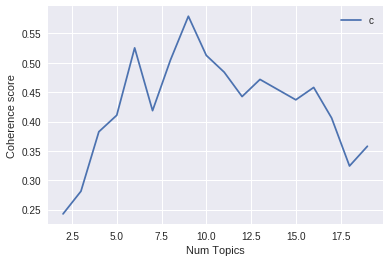

In [183]:
# Show graph
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [184]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2427
Num Topics = 3  has Coherence Value of 0.2813
Num Topics = 4  has Coherence Value of 0.3826
Num Topics = 5  has Coherence Value of 0.4107
Num Topics = 6  has Coherence Value of 0.5254
Num Topics = 7  has Coherence Value of 0.4185
Num Topics = 8  has Coherence Value of 0.5048
Num Topics = 9  has Coherence Value of 0.5792
Num Topics = 10  has Coherence Value of 0.5127
Num Topics = 11  has Coherence Value of 0.484
Num Topics = 12  has Coherence Value of 0.4425
Num Topics = 13  has Coherence Value of 0.4717
Num Topics = 14  has Coherence Value of 0.4543
Num Topics = 15  has Coherence Value of 0.437
Num Topics = 16  has Coherence Value of 0.458
Num Topics = 17  has Coherence Value of 0.4061
Num Topics = 18  has Coherence Value of 0.3243
Num Topics = 19  has Coherence Value of 0.3579


In [185]:
print(coherence_values)

[0.24272794502105272, 0.28132634478738644, 0.3825997292328317, 0.4107013599932052, 0.5253723558324254, 0.41853077839672087, 0.5047911506262814, 0.5792387801768261, 0.5126694757049958, 0.4840403200922098, 0.44251945193757897, 0.4716879792922721, 0.45431804945023185, 0.43696581077720176, 0.4580420284596757, 0.40608630520369715, 0.32431443184155984, 0.3579255287183033]


In [186]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))


[(0, '0.013*"humility" + 0.010*"identity" + 0.010*"model" + 0.010*"configuration" + 0.008*"study" + 0.007*"self" + 0.006*"measure" + 0.006*"prosocial" + 0.006*"research" + 0.006*"ceo"'), (1, '0.017*"entrant" + 0.016*"incumbent" + 0.016*"price" + 0.012*"competitive" + 0.011*"response" + 0.010*"market" + 0.010*"entry" + 0.008*"effect" + 0.008*"manager" + 0.008*"commitment"'), (2, '0.023*"bootlegging" + 0.017*"individual" + 0.015*"innovation" + 0.013*"r&d" + 0.010*"effort" + 0.009*"time" + 0.009*"unit" + 0.009*"performance" + 0.008*"idea" + 0.008*"organization"'), (3, '0.017*"ceo" + 0.016*"decision" + 0.014*"performance" + 0.014*"fwc" + 0.012*"resource" + 0.009*"research" + 0.008*"effect" + 0.008*"family" + 0.008*"self" + 0.006*"work"'), (4, '0.024*"manager" + 0.023*"help" + 0.015*"emotion" + 0.012*"employee" + 0.010*"subordinate" + 0.010*"emotion_help" + 0.009*"emotional" + 0.008*"role" + 0.008*"behavior" + 0.007*"provide"'), (5, '0.002*"firm" + 0.001*"corporate" + 0.001*"social" + 0.001

In [187]:
print(np.shape(bow_corpus))
print(bow_corpus)

(9,)
[[(0, 5), (1, 2), (2, 1), (3, 1), (4, 3), (5, 2), (6, 8), (7, 2), (8, 5), (9, 3), (10, 3), (11, 4), (12, 20), (13, 2), (14, 1), (15, 3), (16, 1), (17, 6), (18, 3), (19, 3), (20, 1), (21, 5), (22, 1), (23, 2), (24, 6), (25, 2), (26, 8), (27, 4), (28, 1), (29, 5), (30, 2), (31, 2), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 4), (38, 1), (39, 1), (40, 6), (41, 1), (42, 1), (43, 1), (44, 4), (45, 4), (46, 2), (47, 6), (48, 3), (49, 5), (50, 1), (51, 3), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 2), (64, 1), (65, 3), (66, 1), (67, 1), (68, 2), (69, 6), (70, 2), (71, 1), (72, 1), (73, 2), (74, 3), (75, 4), (76, 1), (77, 2), (78, 12), (79, 5), (80, 1), (81, 16), (82, 1), (83, 3), (84, 3), (85, 2), (86, 2), (87, 3), (88, 2), (89, 2), (90, 3), (91, 1), (92, 1), (93, 2), (94, 3), (95, 1), (96, 10), (97, 2), (98, 1), (99, 11), (100, 3), (101, 3), (102, 1), (103, 1), (104, 2), (105, 1), (106, 1), (107, 6), (108, 1), (109, 1)

In [188]:
print(list(optimal_model[bow_corpus]))

[([(4, 0.9999785)], [(0, [4]), (1, [4]), (2, [4]), (3, [4]), (4, [4]), (5, [4]), (6, [4]), (7, [4]), (8, [4]), (9, [4]), (10, [4]), (11, [4]), (12, [4]), (13, [4]), (14, [4]), (15, [4]), (16, [4]), (17, [4]), (18, [4]), (19, [4]), (20, [4]), (21, [4]), (22, [4]), (23, [4]), (24, [4]), (25, [4]), (26, [4]), (27, [4]), (28, [4]), (29, [4]), (30, [4]), (31, [4]), (32, [4]), (33, [4]), (34, [4]), (35, [4]), (36, [4]), (37, [4]), (38, [4]), (39, [4]), (40, [4]), (41, [4]), (42, [4]), (43, [4]), (44, [4]), (45, [4]), (46, [4]), (47, [4]), (48, [4]), (49, [4]), (50, [4]), (51, [4]), (52, [4]), (53, [4]), (54, [4]), (55, [4]), (56, [4]), (57, [4]), (58, [4]), (59, [4]), (60, [4]), (61, [4]), (62, [4]), (63, [4]), (64, [4]), (65, [4]), (66, [4]), (67, [4]), (68, [4]), (69, [4]), (70, [4]), (71, [4]), (72, [4]), (73, [4]), (74, [4]), (75, [4]), (76, [4]), (77, [4]), (78, [4]), (79, [4]), (80, [4]), (81, [4]), (82, [4]), (83, [4]), (84, [4]), (85, [4]), (86, [4]), (87, [4]), (88, [4]), (89, [4]),

In [189]:
optimal_model.show_topic(2)

[('bootlegging', 0.022759533),
 ('individual', 0.016776307),
 ('innovation', 0.015445003),
 ('r&d', 0.012700118),
 ('effort', 0.009696123),
 ('time', 0.008979701),
 ('unit', 0.008862213),
 ('performance', 0.008779645),
 ('idea', 0.007899784),
 ('organization', 0.007680162)]

In [0]:
# sent_topics_df = pd.DataFrame()
# for i, row in enumerate(optimal_model[bow_corpus]):
#   new_row = row[2]
#   new_row_sorted = sorted(new_row, key=lambda x: (x[1][0][1]), reverse=True)
#   #print(new_row_sorted)
  
# #   topic_num = new_row_sorted[0][1][0][0]
# #   wp = ldamodel.show_topic(topic_num)

#   print('**************************************************')
#   for j, (keyword,[(topic_num, prop_topic)]) in enumerate(new_row_sorted):
#     #print(prop_topic)
#     if j == 0:  #do it just one time(to get dominant in sorted above)
#       wp = ldamodel.show_topic(topic_num)
#       topic_keywords = ", ".join([word for word, prop in wp])
#       sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#     else:
#       break
#   #print(new_row)
#   #print(new_row[0][1][0][1])
#   #print('i=' + str(i) +';'+ 'row=' + str(row[2]))

In [191]:
print(np.shape(raw_corpus))
print(type(raw_corpus))

print(np.shape(bow_corpus))
print(type(bow_corpus))

(9,)
<class 'list'>
(9,)
<class 'list'>


In [0]:
# ldamodel=lda_model
# corpus=bow_corpus
# texts=raw_corpus

def format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=raw_corpus):
    # Init output
  sent_topics_df = pd.DataFrame()

    # Get main topic in each document
  for i, row in enumerate(optimal_model[bow_corpus]):
    new_row = row[2]
    new_row_sorted = sorted(new_row, key=lambda x: (x[1][0][1]), reverse=True)
    prop_topic = new_row_sorted[0][1][0][1]
    topic_num = new_row_sorted[0][1][0][0]
#   keyword = new_row_sorted[0][0]
  
    wp = ldamodel.show_topic(topic_num)
    topic_keywords = ", ".join([word for word, prop in wp])
    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

      #print('**************************************************')
#   for j, (keyword,[(topic_num, prop_topic)]) in enumerate(new_row_sorted):
#     if j == 0:  #do it just one time(to get dominant in sorted above)
#       wp = ldamodel.show_topic(topic_num)
#       topic_keywords = ", ".join([word for word, prop in wp])
#       sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#     else:
#       break
          
          
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  #print(sent_topics_df)
  return(sent_topics_df)


In [198]:
for topic_num in range(0,9):
  wp = optimal_model.show_topic(topic_num)
  topic_keywords = ", ".join([word for word, prop in wp])
  print(topic_keywords)
  
# 'firm','ceo','work','may','organizational','organization'  

humility, identity, model, configuration, study, self, measure, prosocial, research, ceo
entrant, incumbent, price, competitive, response, market, entry, effect, manager, commitment
bootlegging, individual, innovation, r&d, effort, time, unit, performance, idea, organization
ceo, decision, performance, fwc, resource, research, effect, family, self, work
manager, help, emotion, employee, subordinate, emotion_help, emotional, role, behavior, provide
firm, corporate, social, activist, boycott, activism, effect, high, contentious, target
age, practice, mature, stereotype_threat, performance, high, engagement, effect, journal, employee
firm, social, corporate, activist, activism, sponsor, boycott, contentious, company, target
high, low, order, effect, industry, climate, corporate_illegality, profitability, industry_profitability, size


In [194]:
print('*******TOPIC FOR EACH DOC*********')
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=bow_corpus, texts=raw_corpus)
print(df_topic_sents_keywords)
#df_topic_sents_keywords

*******TOPIC FOR EACH DOC*********
   Dominant_Topic  Perc_Contribution  \
0             4.0              206.0   
1             6.0              261.0   
2             2.0              190.0   
3             8.0              124.0   
4             1.0              114.0   
5             7.0              196.0   
6             0.0              207.0   
7             0.0              167.0   
8             3.0              120.0   

                                      Topic_Keywords  \
0  manager, help, emotion, employee, subordinate,...   
1  age, practice, mature, stereotype_threat, perf...   
2  bootlegging, individual, innovation, r&d, effo...   
3  high, low, order, effect, industry, climate, c...   
4  entrant, incumbent, price, competitive, respon...   
5  firm, social, corporate, activist, activism, s...   
6  humility, identity, model, configuration, stud...   
7  humility, identity, model, configuration, stud...   
8  ceo, decision, performance, fwc, resource, res...   

   

In [195]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
print('*******DOC FOR EACH TOPIC*********')
sent_topics_sorteddf_lda

*******DOC FOR EACH TOPIC*********


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,207.0,"humility, identity, model, configuration, stud...",Humble Chief\nExecutive Officers’\nConnections...
1,1.0,114.0,"entrant, incumbent, price, competitive, respon...",Received: 27 September 2015\nRevised: 6 Octobe...
2,2.0,190.0,"bootlegging, individual, innovation, r&d, effo...",This article was downloaded by: [193.51.16.194...
3,3.0,120.0,"ceo, decision, performance, fwc, resource, res...",This article was downloaded by: [143.169.185.9...
4,4.0,206.0,"manager, help, emotion, employee, subordinate,...","娀 Academy of Management Journal\n2013, Vol. 56..."
5,6.0,261.0,"age, practice, mature, stereotype_threat, perf...","r Academy of Management Journal\n2016, Vol. 59..."
6,7.0,196.0,"firm, social, corporate, activist, activism, s...",This article was downloaded by: [193.51.16.194...
7,8.0,124.0,"high, low, order, effect, industry, climate, c...","Motive, Opportunity, Choice, and Corporate Ill..."


In [196]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(num_topics)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,4.0,"manager, help, emotion, employee, subordinate,...",2.0,0.2222
1,6.0,"age, practice, mature, stereotype_threat, perf...",1.0,0.1111
2,2.0,"bootlegging, individual, innovation, r&d, effo...",1.0,0.1111
3,8.0,"high, low, order, effect, industry, climate, c...",1.0,0.1111
4,1.0,"entrant, incumbent, price, competitive, respon...",1.0,0.1111
5,7.0,"firm, social, corporate, activist, activism, s...",NaN,NaN
6,0.0,"humility, identity, model, configuration, stud...",1.0,0.1111
7,0.0,"humility, identity, model, configuration, stud...",1.0,0.1111
8,3.0,"ceo, decision, performance, fwc, resource, res...",1.0,0.1111
